In [5]:
from __future__ import absolute_import,division,print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
random.seed(10)

In [6]:
data=keras.datasets.imdb

In [90]:
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=10000)

In [46]:
print(len(train_data))
print(len(test_data))


25000
25000


In [47]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [48]:
data_dt=data.get_word_index()

In [49]:
#print(data_dt)

In [50]:
review_data={v+3:k for k,v in data_dt.items()}

In [52]:
review_data[0]="<PAD>"
review_data[1]="<START>"
review_data[2]="<UNK>"
review_data[3]="<UNUSED>"

In [53]:
#review_data

In [69]:
def integer_to_test(test):
     return " ".join([review_data.get(i,"?") for i in test])

In [73]:
print(train_data[2])
print(integer_to_test(train_data[2]))
#print(train_labels[2])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they ac

In [91]:
#get_word_index()
print(len(train_data[0]))

218


In [92]:
train_data=keras.preprocessing.sequence.pad_sequences(train_data,value=0,padding="post",maxlen=256)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,value=0,padding="post",maxlen=256)

In [93]:
train_data[0]
#len(train_data[0])

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [94]:
# Create model

In [186]:
#model=keras.Sequential()

In [227]:
model=keras.Sequential()

input_dim=10000
output_dim=16
model.add(keras.layers.Embedding(input_dim,output_dim))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_17  (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [228]:
#Create compliter

In [229]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [230]:
x_train=train_data[:10000]
y_train=train_labels[:10000]
x_test=train_data[10000:]
y_test=train_labels[10000:]

In [231]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=40,batch_size=500,verbose=1)

Train on 10000 samples, validate on 15000 samples
Epoch 1/40
10000/10000 [==============================] - 3s 338us/step - loss: 0.6926 - acc: 0.5099 - val_loss: 0.6917 - val_acc: 0.5056
Epoch 2/40
10000/10000 [==============================] - 1s 148us/step - loss: 0.6907 - acc: 0.5203 - val_loss: 0.6901 - val_acc: 0.5209
Epoch 3/40
10000/10000 [==============================] - 1s 150us/step - loss: 0.6890 - acc: 0.5511 - val_loss: 0.6881 - val_acc: 0.5521
Epoch 4/40
10000/10000 [==============================] - 2s 152us/step - loss: 0.6869 - acc: 0.5685 - val_loss: 0.6863 - val_acc: 0.5928
Epoch 5/40
10000/10000 [==============================] - 1s 150us/step - loss: 0.6849 - acc: 0.6078 - val_loss: 0.6839 - val_acc: 0.6321
Epoch 6/40
10000/10000 [==============================] - 2s 152us/step - loss: 0.6821 - acc: 0.6399 - val_loss: 0.6811 - val_acc: 0.6733
Epoch 7/40
10000/10000 [==============================] - 1s 146us/step - loss: 0.6790 - acc: 0.6801 - val_loss: 0.6783 - 

In [232]:
'''
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val))
'''


'\nhistory = model.fit(partial_x_train,\n                    partial_y_train,\n                    epochs=40,\n                    batch_size=512,\n                    validation_data=(x_val, y_val))\n'

In [235]:
print(model.evaluate(test_data,test_labels))

25000/25000 [==============================] - 2s 75us/step
[0.3421611527442932, 0.85876]


In [238]:
desc=history.history

In [239]:
desc.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [240]:
#Plot

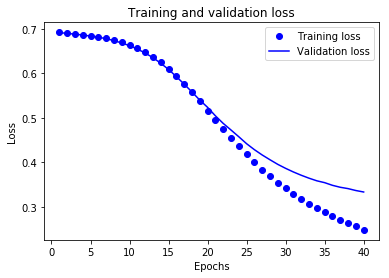

In [242]:
acc = desc['acc']
val_acc = desc['val_acc']
loss = desc['loss']
val_loss = desc['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

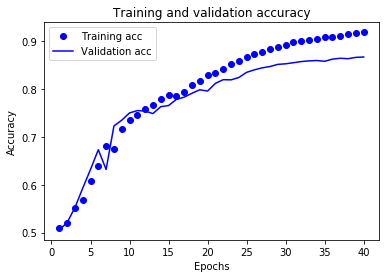

In [243]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [244]:
#https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_text_classification.ipynb
#https://colab.research.google.com/drive/1CNWZ76wKL3Vk2l_f6ymrXaqjtA_TaLsj